In [16]:
import os 
from dotenv import load_dotenv

import random

load_dotenv()

True

In [17]:
GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')
GROQ_API_KEY = os.getenv('GROQ_API_KEY')

In [18]:
import textwrap

from PIL import Image
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, prefix='', predicate=lambda _: True))

def get_image(image): 
    image = Image.open(image).convert("RGB")
    return image

In [19]:
from src.agent.gemini import GeminiAgent
from src.prompt import OBJECT_DETECTION


llm = GeminiAgent(api_key=GEMINI_API_KEY)
prompt = OBJECT_DETECTION
llm.model_meta()


Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=1048576,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      top_p=0.95,
      top_k=64)

CPU times: user 19.4 ms, sys: 4.67 ms, total: 24.1 ms
Wall time: 22.5 ms


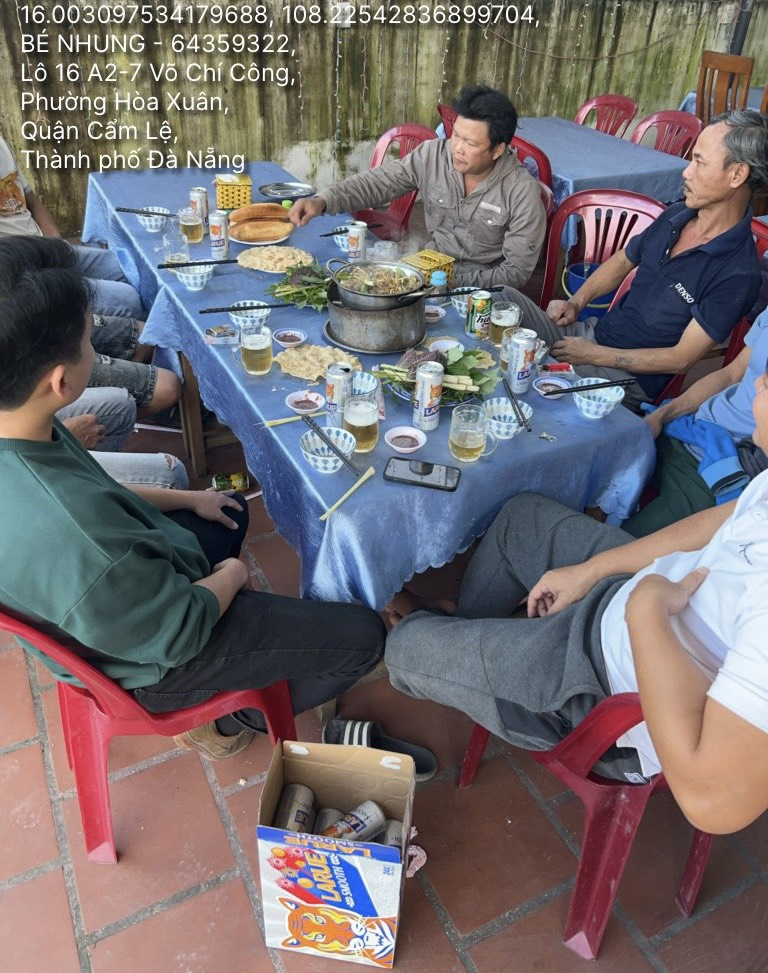

In [20]:
%%time

base_dir = './samples'
rand_idx = random.randint(1, len(os.listdir(base_dir)))
sample = os.path.join('./samples', os.listdir('./samples')[rand_idx])

image = get_image(sample)
image

In [21]:
%%time

response = llm.invoke(prompt=prompt, 
                        image=image)

CPU times: user 21.9 ms, sys: 3.13 ms, total: 25 ms
Wall time: 6.12 s


In [22]:
response.text

'[{"object": "larue_logo", "count": 1, "bbox": [803, 378, 946, 462]}, {"object": "larue_boxes", "count": 1, "bbox": [778, 366, 969, 474]}, {"object": "larue_beer_can", "count": 6, "bbox": [782, 380, 961, 464]}, {"object": "consumer", "count": 4, "bbox": [[287, 0, 742, 277], [106, 386, 373, 720], [123, 758, 457, 999], [352, 498, 754, 999]]}, {"object": "consumer_group", "count": 1, "bbox": [103, 0, 759, 999]}, {"object": "casual_dining", "count": 1, "bbox": [103, 0, 759, 999]}, {"object": "outdoor_venue", "count": 1, "bbox": [103, 0, 759, 999]}, {"object": "seating_area", "count": 4, "bbox": [[184, 193, 344, 294], [178, 485, 348, 588], [176, 728, 360, 831], [192, 895, 434, 999]]}, {"object": "counter_area", "count": 1, "bbox": [195, 231, 660, 893]}, {"object": "interior_view", "count": 1, "bbox": [103, 0, 759, 999]}]\n'

In [23]:
import json

json_obj = json.loads(response.text)
json_obj

[{'object': 'larue_logo', 'count': 1, 'bbox': [803, 378, 946, 462]},
 {'object': 'larue_boxes', 'count': 1, 'bbox': [778, 366, 969, 474]},
 {'object': 'larue_beer_can', 'count': 6, 'bbox': [782, 380, 961, 464]},
 {'object': 'consumer',
  'count': 4,
  'bbox': [[287, 0, 742, 277],
   [106, 386, 373, 720],
   [123, 758, 457, 999],
   [352, 498, 754, 999]]},
 {'object': 'consumer_group', 'count': 1, 'bbox': [103, 0, 759, 999]},
 {'object': 'casual_dining', 'count': 1, 'bbox': [103, 0, 759, 999]},
 {'object': 'outdoor_venue', 'count': 1, 'bbox': [103, 0, 759, 999]},
 {'object': 'seating_area',
  'count': 4,
  'bbox': [[184, 193, 344, 294],
   [178, 485, 348, 588],
   [176, 728, 360, 831],
   [192, 895, 434, 999]]},
 {'object': 'counter_area', 'count': 1, 'bbox': [195, 231, 660, 893]},
 {'object': 'interior_view', 'count': 1, 'bbox': [103, 0, 759, 999]}]

In [26]:
bboxes = [sample['bbox'] for sample in json_obj if sample['bbox']]


[[803, 378, 946, 462],
 [778, 366, 969, 474],
 [782, 380, 961, 464],
 [[287, 0, 742, 277],
  [106, 386, 373, 720],
  [123, 758, 457, 999],
  [352, 498, 754, 999]],
 [103, 0, 759, 999],
 [103, 0, 759, 999],
 [103, 0, 759, 999],
 [[184, 193, 344, 294],
  [178, 485, 348, 588],
  [176, 728, 360, 831],
  [192, 895, 434, 999]],
 [195, 231, 660, 893],
 [103, 0, 759, 999]]

In [ ]:
import cv2

def draw_bounding_box(image, bbox, color=(0, 255, 0), thickness=2):
  """
  Draws a bounding box on an image.

  Args:
      image: The image as a NumPy array.
      bbox: A list of four integers representing the top-left (x, y) and bottom-right (x, y) coordinates of the bounding box.
      color: The color of the bounding box (BGR format). Defaults to green.
      thickness: The thickness of the bounding box lines. Defaults to 2.

  Returns:
      The image with the bounding box drawn on it.
  """
  # Extract bounding box coordinates
  x_min, y_min, x_max, y_max = bbox

  # Draw the bounding box
  cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

  return image

# Example usage
image = cv2.imread("your_image.jpg")  # Replace with your image path
bbox = [100, 50, 200, 150]  # Replace with actual bounding box coordinates

image_with_bbox = draw_bounding_box(image.copy(), bbox)  # Copy image to avoid modifying original

cv2.imshow("Image with Bounding Box", image_with_bbox)
cv2.waitKey(0)  # Wait for a key press to close the window
cv2.destroyAllWindows()